# Las matemáticas tras la regresión logística

## Las tablas de contingencia

In [1]:
import pandas as pd

In [2]:
root = '/home/giovannyencinia/Documents/datasets/MACHINE_LEARNING_course'
path = root + '/gender-purchase/Gender Purchase.csv'

In [3]:
genderp = pd.read_csv(path)
genderp.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


El data frame esta limpio

In [4]:
contingency_table = pd.crosstab(genderp.Gender, genderp.Purchase)
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [5]:
contingency_table.sum(axis = 1)

Gender
Female    265
Male      246
dtype: int64

In [6]:
contingency_table.astype("float").div(contingency_table.sum(axis=1), axis=0)

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


# Regresión logística

In [7]:
import pandas as pd

In [8]:
root='/home/giovannyencinia/Documents/datasets/MACHINE_LEARNING_course/bank/bank.csv'
bank = pd.read_csv(root, sep = ';')
bank.head()
bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bank.education.unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [10]:
bank.y = (bank.y == 'yes').astype(int)

In [11]:
bank.education = bank.education.replace(['basic.9y', 'basic.6y', 'basic.4y'], 'Basic')

In [12]:
bank.education = bank.education.replace(['high.school', 'university.degree', 
                                         'professional.course', 'unknown', 
                                         'illiterate'], 
                                        ['High School', 'University', 
                                         'Professional Course','Unknown',
                                         'Illiterate'])
bank.education.unique()

array(['Basic', 'High School', 'University', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

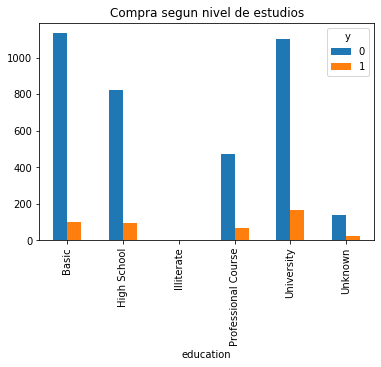

In [13]:
import matplotlib.pyplot as plt
a = pd.crosstab(bank.education, bank.y)
a.plot(kind = 'bar')
plt.title('Compra segun nivel de estudios');

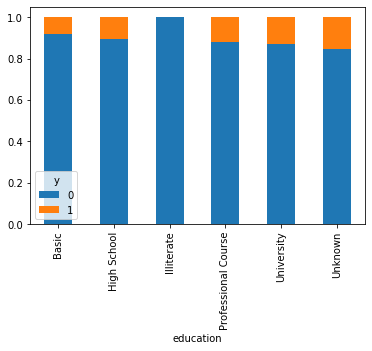

In [14]:
a.div(a.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True);

In [15]:
a

y,0,1
education,,
Basic,1133,98
High School,824,97
Illiterate,1,0
Professional Course,470,65
University,1099,165
Unknown,141,26


In [16]:
a.sum(1)

education
Basic                  1231
High School             921
Illiterate                1
Professional Course     535
University             1264
Unknown                 167
dtype: int64

In [17]:
a.div(a.sum(1).astype('float'), axis=0)

y,0,1
education,,
Basic,0.920390,0.079610
High School,0.894680,0.105320
Illiterate,1.000000,0.000000
Professional Course,0.878505,0.121495
University,0.869462,0.130538
Unknown,0.844311,0.155689


## Conversion de la variables categoricas dummie

In [18]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan',
              'contact', 'month', 'day_of_week', 'poutcome']

In [19]:
for cat in categories:
    temp = pd.get_dummies(bank[cat],prefix=cat)
    bank = pd.concat([bank, temp], axis=1)

In [20]:
columns = bank.columns.tolist()
nice_column = [nice for nice in columns if ((nice not in categories) and (nice!='y'))]
nice_column

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University',
 'education_Unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 '

In [21]:
X= bank[nice_column]
X.columns
print(X.isnull().sum())

age                     0
duration                0
campaign                0
pdays                   0
previous                0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 61, dtype: int64


In [22]:
bank.y.value_counts()
y = bank.y
y

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: y, Length: 4119, dtype: int64

## Seleccion de rasgos para modelo

In [23]:
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [24]:
#define model
bank_model = LogisticRegression()
#Elegis rasgos
selector = RFE(bank_model, 12)

In [25]:
selector = selector.fit(X, y)

/home/giovannyencinia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/giovannyencinia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

/home/giovannyencinia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/giovannyencinia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

In [27]:
import numpy as np
index = np.argsort(selector.ranking_)
index

array([60, 43, 45, 48, 49, 50, 19, 15, 20, 58,  8,  4, 10, 18, 47, 42, 44,
       31, 41, 16, 35, 57, 12, 14, 11, 27, 38, 36, 22,  5,  2, 29, 39, 46,
        7, 54, 26,  6, 52, 56, 32, 24, 30,  0, 17, 55, 23, 33, 51, 59, 40,
        9, 13, 53,  1, 37,  3, 21, 28, 25, 34])

In [28]:
nice_column = np.array(nice_column)
nice_column = nice_column[index < 12]


In [29]:
nice_column = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [49]:
len(nice_column)

12

In [30]:
X = X[nice_column]
X.head()

,previous,euribor3m,job_blue-collar,job_retired,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,day_of_week_wed,poutcome_nonexistent
0,0,1.313,1,0,0,0,0,0,0,0,0,1
1,0,4.855,0,0,0,0,0,0,0,0,0,1
2,0,4.962,0,0,0,0,0,1,0,0,1,1
3,0,4.959,0,0,0,0,0,1,0,0,0,1
4,0,4.191,0,0,0,0,0,0,0,1,0,1


In [31]:
model = LogisticRegression()

In [32]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.score(X, y) ## Es el R^2

0.8958485069191552

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, 
                                                    random_state=33)

In [35]:
model2 = LogisticRegression()
model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
model2.score(X_train, Y_train)

0.8974203338391502

In [37]:
y_e = model2.predict_proba(X_test)

In [38]:
prediction = model2.predict(X_test)

In [39]:
y_e = y_e[:, 1]

In [40]:
y_e = np.where(y_e > 0.05, 1, 0)
y_e

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [41]:
pd.crosstab(y_e, columns='count')

col_0,count
row_0,
0,179
1,645


In [42]:
from sklearn import metrics

In [43]:
metrics.accuracy_score(Y_test, prediction)

0.8944174757281553

## Validacion cruzada

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
score = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

In [46]:
score.mean()

0.8943903101599225

## Tabla de confusion y grafica ROC

In [61]:
prediction = model2.predict_proba(X)

In [71]:
import ggplot

AttributeError: module 'pandas' has no attribute 'tslib'

In [70]:
i

AttributeError: module 'pandas' has no attribute 'tslib'

ModuleNotFoundError: No module named 'plotnine'